In [1]:
# Importing libraries for Data Cleaning and EDA:

import os
import numpy as np
import pandas as pd
import matplotlib as mlt
%matplotlib inline
mlt.rcParams["patch.force_edgecolor"] = True
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set_style("whitegrid")
sbn.set(font_scale = 1.35)
from fancyimpute import IterativeImputer
import datetime

Using TensorFlow backend.


In [2]:
# Importing libraries for statistical tests & modelling:


from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# Setting the working directory:

os.chdir('/Users/guesthouser/dev/data-science-projects')

In [4]:
# Reading the data file:

df = pd.read_csv("train.csv", sep = ",")

In [5]:
# Checking the head of the dataframe:

df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
# Checking the datatype & dimensions information of data:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

**Missing Value Analysis:**

In [7]:
# Checking for missing values in the data:

df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [8]:
# Removing variables not required for analysis:

df = df.drop(axis=1, columns=["id","description","amenities","longitude","latitude","name","thumbnail_url","first_review","last_review","zipcode","neighbourhood"])

In [9]:
# Converting host_response_rate from str to float:

def cust(x):
    if isinstance(x, str)== True:
        return x.strip("%")
    else:
        return x
    
df['host_response_rate'] = df["host_response_rate"].apply(cust)
df['host_response_rate'] = df['host_response_rate'].apply(float)

In [10]:
# Converting datetime str to PD timestamp:

df = df.sort_values(by= "host_since", ascending = True).reset_index(drop = True)

def time(x):
    if isinstance(x, str)== True:
        return (pd.Timestamp(x) - datetime.datetime(1970,1,1)).total_seconds()
    else:
        return x
    
df['host_since'] = df["host_since"].apply(time)

In [11]:
# Checking info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 18 columns):
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null float64
host_since                73923 non-null float64
instant_bookable          74111 non-null object
number_of_reviews         74111 non-null int64
review_scores_rating      57389 non-null float64
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: bool(1), float64

In [12]:
# Removing certain property_type:

redund = ['Parking Space','Island','Lighthouse','Casa particular','Cave','Train','Tipi','Earth House']  
df = df[df['property_type'].isin(redund) == False]

****
**Data Visualization for Insights:**


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


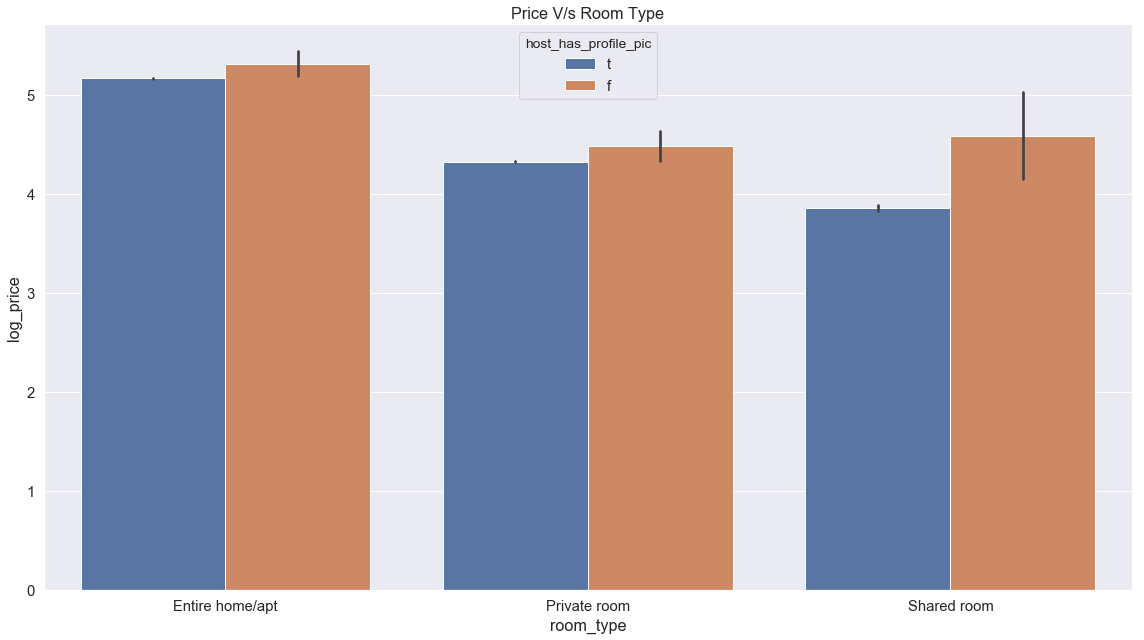

In [13]:
plt.figure(figsize=(16,9))
sbn.barplot(x='room_type',y='log_price',data=df,hue='host_has_profile_pic')
plt.title('Price V/s Room Type')
plt.tight_layout()

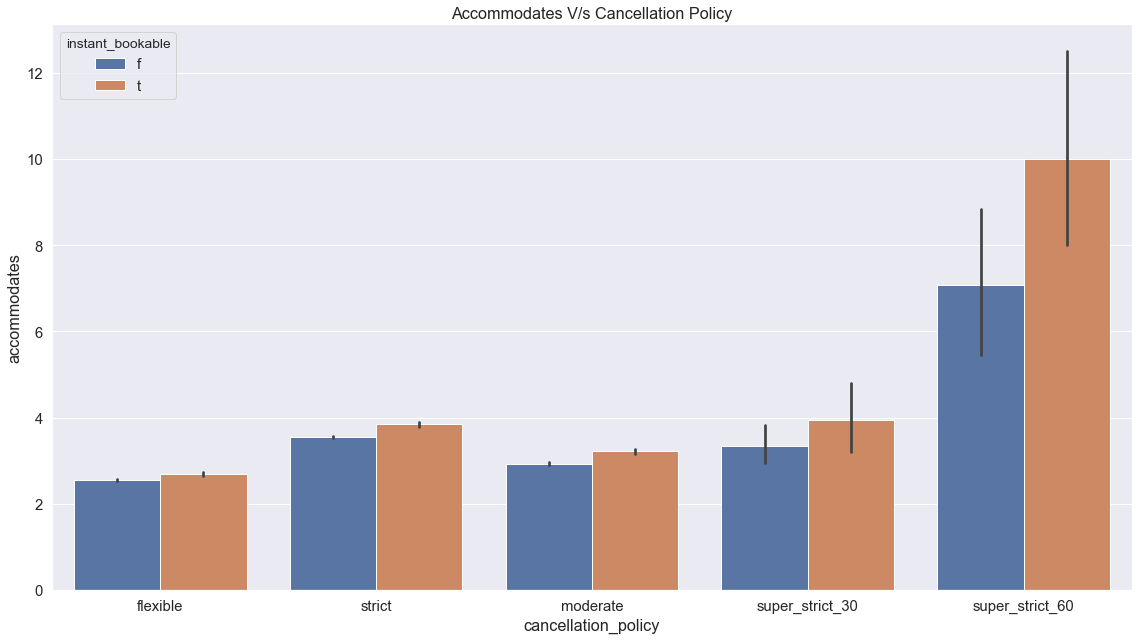

In [14]:
plt.figure(figsize=(16,9))
sbn.barplot(x='cancellation_policy',y='accommodates',data=df,hue='instant_bookable')
plt.title('Accommodates V/s Cancellation Policy')
plt.tight_layout()

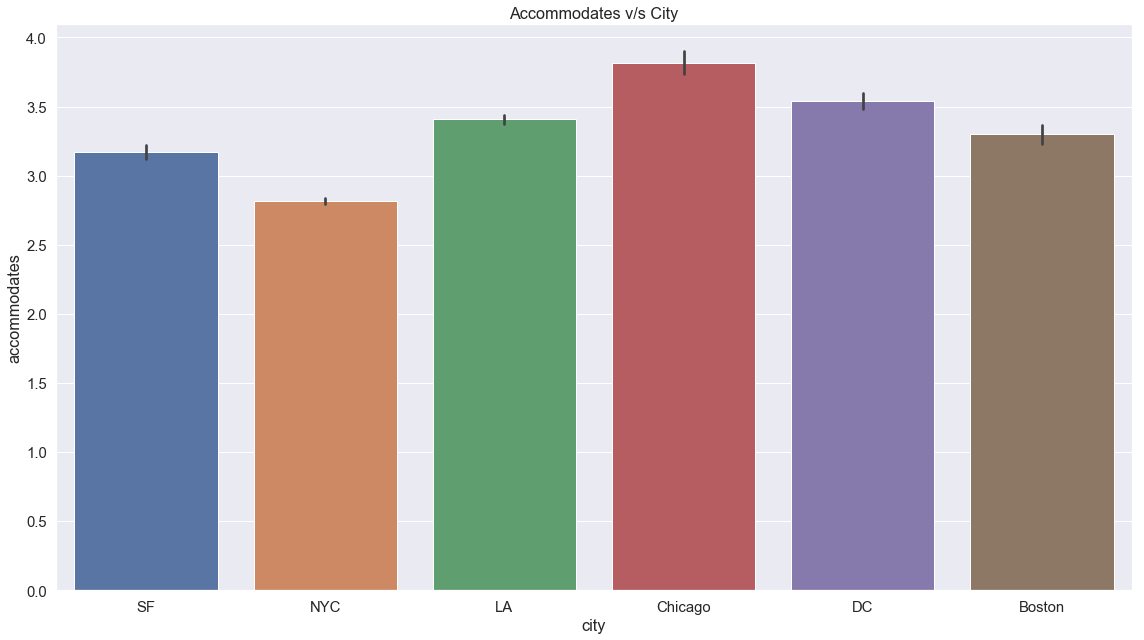

In [15]:
plt.figure(figsize=(16,9))
sbn.barplot(x='city',y='accommodates',data=df)
plt.title('Accommodates v/s City')
plt.tight_layout()

In [16]:
# Encoding Categories:

maps = {}
cat = []
for i in list(df.columns):
    if (df.loc[:,i].dtypes == 'object' or df.loc[:,i].dtypes == 'bool'):
        df.loc[:,i] = pd.Categorical(df.loc[:,i])
        elem = dict(enumerate(df.loc[:,i].cat.categories))
        maps[i] = elem
        cat.append(i)
        df.loc[:,i] = df.loc[:,i].cat.codes
        df.loc[:,i] = df.loc[:,i].replace(-1,np.nan)
        df.loc[:,i] = df.loc[:,i].astype('object')

In [17]:
# Scaling 'host_since' variable:

num = []
for i in list(df.columns):
    if (df.loc[:,i].dtypes not in ['object','bool']):
        num.append(i)
scaler = StandardScaler()
df.loc[:,'host_since'] = scaler.fit_transform(df[['host_since']])

In [18]:
# Encoded Values:

maps

{'property_type': {0: 'Apartment',
  1: 'Bed & Breakfast',
  2: 'Boat',
  3: 'Boutique hotel',
  4: 'Bungalow',
  5: 'Cabin',
  6: 'Camper/RV',
  7: 'Castle',
  8: 'Chalet',
  9: 'Condominium',
  10: 'Dorm',
  11: 'Guest suite',
  12: 'Guesthouse',
  13: 'Hostel',
  14: 'House',
  15: 'Hut',
  16: 'In-law',
  17: 'Loft',
  18: 'Other',
  19: 'Serviced apartment',
  20: 'Tent',
  21: 'Timeshare',
  22: 'Townhouse',
  23: 'Treehouse',
  24: 'Vacation home',
  25: 'Villa',
  26: 'Yurt'},
 'room_type': {0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'},
 'bed_type': {0: 'Airbed',
  1: 'Couch',
  2: 'Futon',
  3: 'Pull-out Sofa',
  4: 'Real Bed'},
 'cancellation_policy': {0: 'flexible',
  1: 'moderate',
  2: 'strict',
  3: 'super_strict_30',
  4: 'super_strict_60'},
 'cleaning_fee': {0: False, 1: True},
 'city': {0: 'Boston', 1: 'Chicago', 2: 'DC', 3: 'LA', 4: 'NYC', 5: 'SF'},
 'host_has_profile_pic': {0: 'f', 1: 't'},
 'host_identity_verified': {0: 'f', 1: 't'},
 'instant_bookable

In [19]:
# Calculating the missing value percentage:

mis_val = pd.DataFrame(df.isnull().sum()).reset_index()
mis_val = mis_val.rename(columns = {"index":"variables",0:"mis_per"})
mis_val["mis_per"] = (mis_val["mis_per"]/len(df))*100
mis_val = mis_val.sort_values(by="mis_per", ascending = False).reset_index(drop = True)
mis_val

,variables,mis_per
0,host_response_rate,24.692291
1,review_scores_rating,22.562621
2,bathrooms,0.268571
3,host_has_profile_pic,0.253725
4,host_identity_verified,0.253725
5,host_since,0.253725
6,beds,0.176798
7,bedrooms,0.122814
8,cleaning_fee,0.000000
9,city,0.000000


In [20]:
# Applying Iterative Imputer:

df = pd.DataFrame(data = IterativeImputer().fit_transform(df.values), columns = df.columns)

In [21]:
# Checking data attributes:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74096 entries, 0 to 74095
Data columns (total 18 columns):
log_price                 74096 non-null float64
property_type             74096 non-null float64
room_type                 74096 non-null float64
accommodates              74096 non-null float64
bathrooms                 74096 non-null float64
bed_type                  74096 non-null float64
cancellation_policy       74096 non-null float64
cleaning_fee              74096 non-null float64
city                      74096 non-null float64
host_has_profile_pic      74096 non-null float64
host_identity_verified    74096 non-null float64
host_response_rate        74096 non-null float64
host_since                74096 non-null float64
instant_bookable          74096 non-null float64
number_of_reviews         74096 non-null float64
review_scores_rating      74096 non-null float64
bedrooms                  74096 non-null float64
beds                      74096 non-null float64
dtypes: f

In [22]:
# Category variables value check:

for i in cat:
    df[i] = df[i].round()

In [23]:
# Datatype conversion:

for i in cat:
    df[i] = df[i].astype('category')

**Outlier Analysis**

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


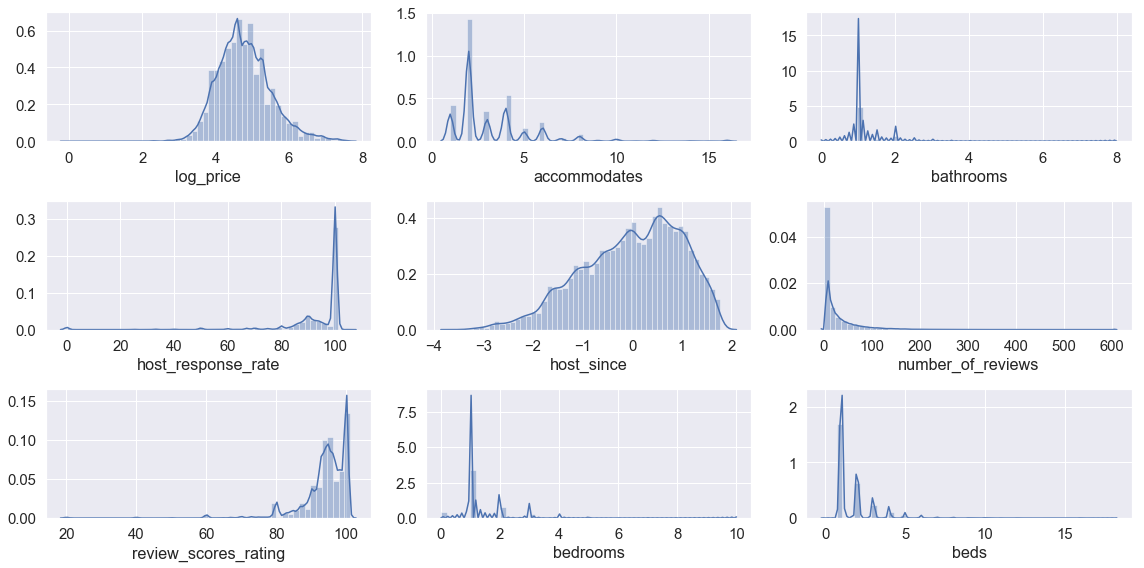

In [24]:
# Checking distribution of numerical variables:

fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(16,8))

sbn.distplot(df['log_price'],ax= axes[0][0])
sbn.distplot(df['accommodates'],ax= axes[0][1])
sbn.distplot(df['bathrooms'],ax= axes[0][2])
sbn.distplot(df['host_response_rate'],ax= axes[1][0])
sbn.distplot(df['host_since'],ax= axes[1][1])
sbn.distplot(df['number_of_reviews'],ax= axes[1][2])
sbn.distplot(df['review_scores_rating'],ax= axes[2][0])
sbn.distplot(df['bedrooms'],ax= axes[2][1])
sbn.distplot(df['beds'],ax= axes[2][2])

plt.tight_layout()

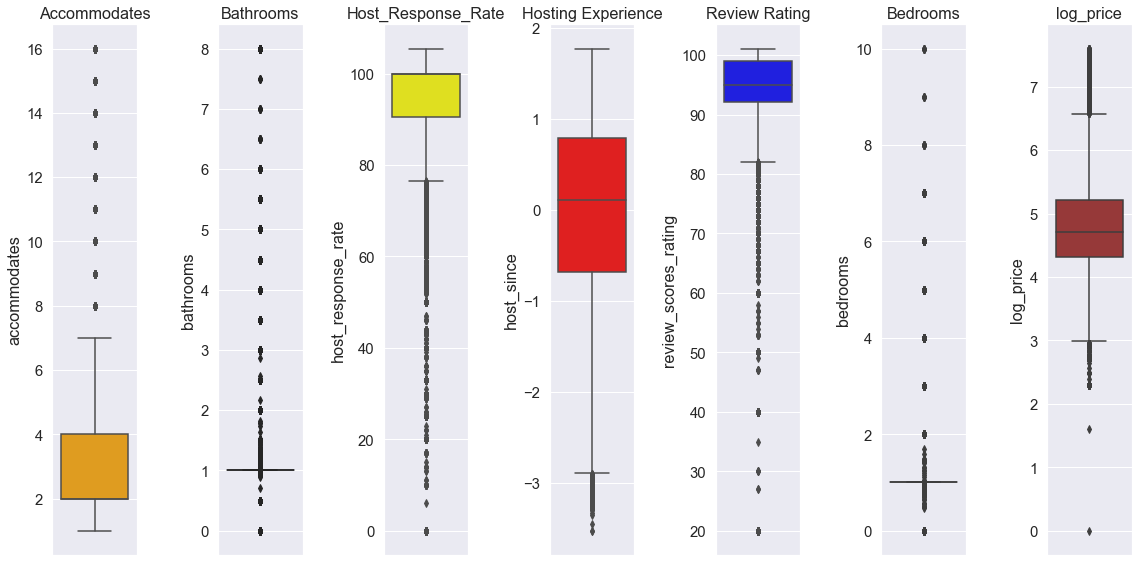

In [25]:
# Making the figure and subplots for the boxplot visualization:

fig,axes = plt.subplots(nrows=1,ncols=7,figsize=(16,8))


sbn.boxplot(df['accommodates'], ax = axes[0], orient='v', color='orange').set_title('Accommodates')
sbn.boxplot(df['bathrooms'], ax = axes[1], orient='v', color='green').set_title('Bathrooms')
sbn.boxplot(df['host_response_rate'], ax = axes[2], orient='v', color='yellow').set_title('Host_Response_Rate')
sbn.boxplot(df['host_since'], ax = axes[3], orient='v', color='red').set_title('Hosting Experience')
sbn.boxplot(df['review_scores_rating'], ax = axes[4], orient='v', color='blue').set_title('Review Rating')
sbn.boxplot(df['bedrooms'], ax = axes[5], orient='v', color='brown').set_title('Bedrooms')
sbn.boxplot(df['log_price'], ax = axes[6], orient='v', color='brown').set_title('log_price')

# For better visibility of labels:
plt.tight_layout()

In [26]:
df.groupby(by='accommodates').mean()

,log_price,bathrooms,host_response_rate,host_since,number_of_reviews,review_scores_rating,bedrooms,beds
accommodates,,,,,,,,
1.0,4.179346,1.119060,90.875811,0.111069,10.935320,93.622599,0.970210,1.055380
2.0,4.552318,1.086060,92.999369,-0.032455,21.977550,94.182177,0.896956,1.087149
3.0,4.805300,1.076718,93.712693,-0.010004,23.036952,93.823968,0.958329,1.507328
4.0,5.062702,1.209202,94.191174,-0.039834,22.364556,94.152795,1.360628,1.991013
5.0,5.257190,1.429008,94.601493,0.016886,22.004938,93.805536,1.860877,2.600224
6.0,5.450003,1.647007,95.046628,0.018424,23.640499,94.178352,2.275256,3.139703
7.0,5.532043,1.809725,95.533637,0.063281,23.094080,93.392264,2.615222,3.854123
8.0,5.732796,2.124510,94.958877,0.096138,22.946488,93.733888,2.984392,4.202191
9.0,5.706757,2.229630,95.306660,-0.009938,27.348148,93.725395,3.248148,4.770370


From the above info, it makes sense to make 2 models, first in which no. of accommodates <=8 and for the second, no. of accommodates >8.

This is because, removing outliers is naiive and flooring & capping method is not working too. And since, accommodates varibale shows positive correlation with bedrooms, beds, bathrooms & price, this is the chosen variable for the bifurcation of model.

In [27]:
# Bifurcation of data:

df_h = df[df['accommodates']>=8].copy()
df_h = df_h.reset_index(drop=True)
df = df[df['accommodates']<8]
df = df.reset_index(drop=True)

**Feature Selection & Dimensionality Reduction:**

Text(0.5, 1.0, 'Accommodates<=8')

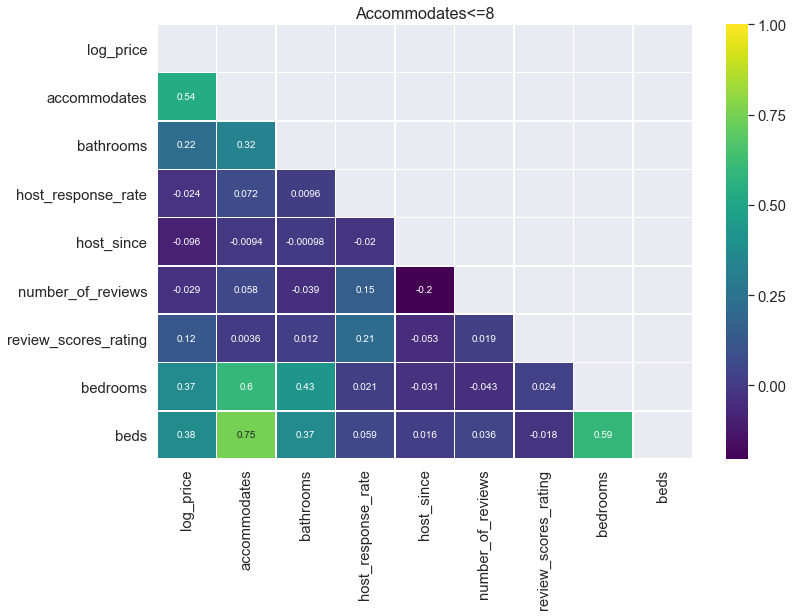

In [28]:
# Correlation heatmap to determine the highly correlated variables:

plt.figure(figsize=(12,8))
mask = np.zeros_like(df[num].corr(),dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sbn.heatmap(data = df[num].corr(), annot = True, mask = mask, cmap='viridis',lw=0.5).set_title('Accommodates<=8')

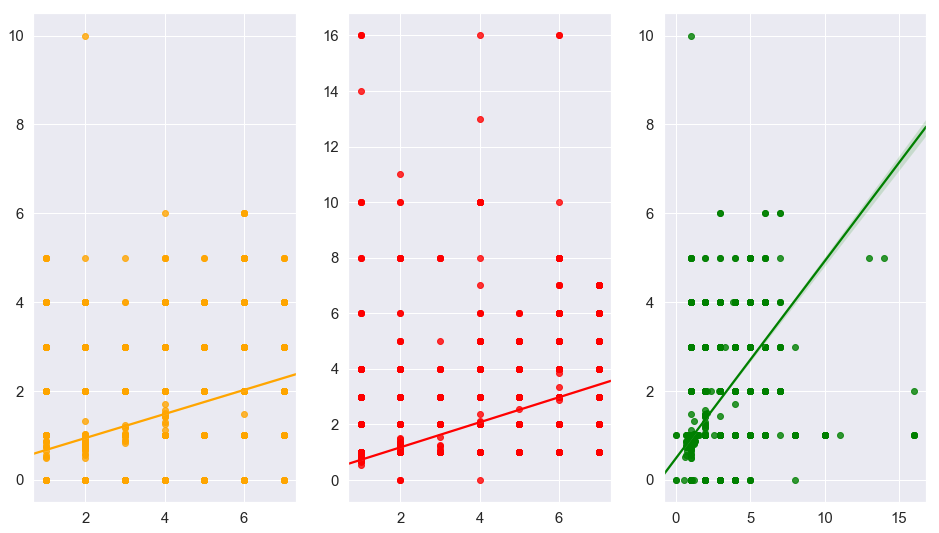

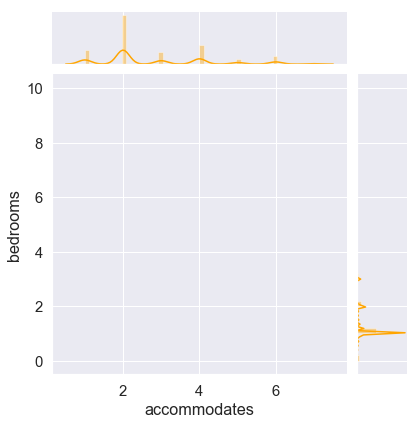

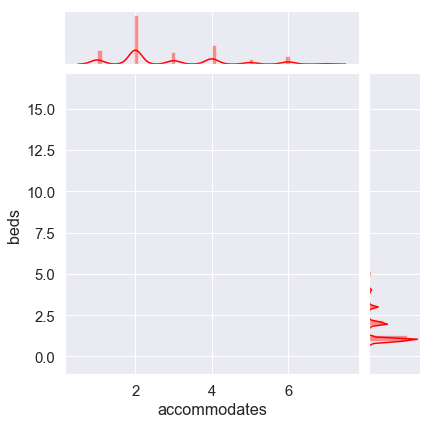

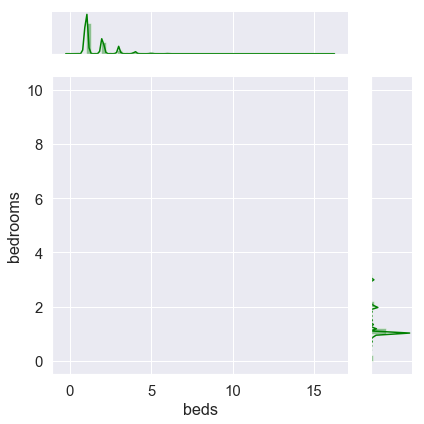

In [29]:
# Scatterplots of correlated variables:

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,9))

sbn.jointplot(x='accommodates',y='bedrooms',ax = axes[0],data=df,kind='reg', color='orange')
sbn.jointplot(x='accommodates',y='beds',ax = axes[1], data=df,kind='reg',color='red')
sbn.jointplot(x='beds',y='bedrooms',ax = axes[2],data=df,kind='reg',color='green')

plt.tight_layout()

****
Even though, there is certain correlation between the variables, there is no relationship which appears to be there. So not dropping variables on the basis of correlation among them.

Text(0.5, 1.0, 'Accommodates>8')

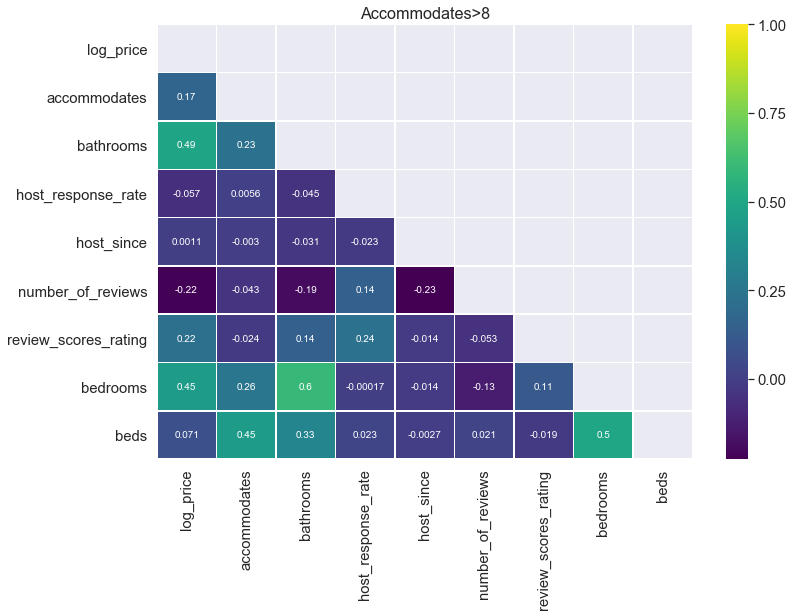

In [30]:
# Correlation heatmap to determine the highly correlated variables:

plt.figure(figsize=(12,8))
mask = np.zeros_like(df_h[num].corr(),dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sbn.heatmap(data = df_h[num].corr(), annot = True, mask = mask, cmap='viridis',lw=0.5).set_title('Accommodates>8')

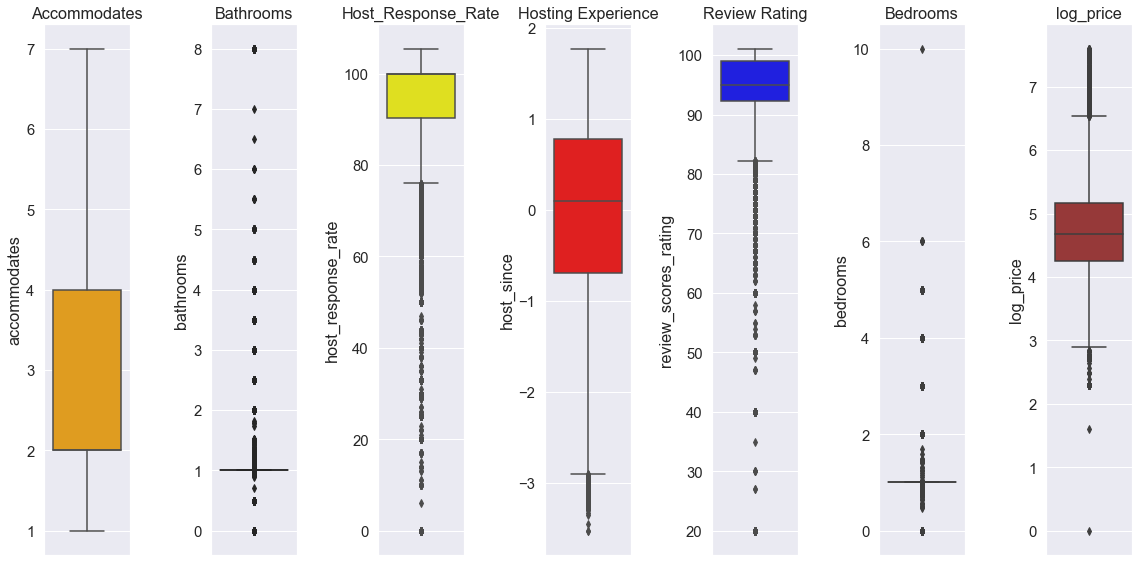

In [31]:
# Making the figure and subplots for the boxplot visualization:

fig,axes = plt.subplots(nrows=1,ncols=7,figsize=(16,8))


sbn.boxplot(df['accommodates'], ax = axes[0], orient='v', color='orange').set_title('Accommodates')
sbn.boxplot(df['bathrooms'], ax = axes[1], orient='v', color='green').set_title('Bathrooms')
sbn.boxplot(df['host_response_rate'], ax = axes[2], orient='v', color='yellow').set_title('Host_Response_Rate')
sbn.boxplot(df['host_since'], ax = axes[3], orient='v', color='red').set_title('Hosting Experience')
sbn.boxplot(df['review_scores_rating'], ax = axes[4], orient='v', color='blue').set_title('Review Rating')
sbn.boxplot(df['bedrooms'], ax = axes[5], orient='v', color='brown').set_title('Bedrooms')
sbn.boxplot(df['log_price'], ax = axes[6], orient='v', color='brown').set_title('log_price')

# For better visibility of labels:
plt.tight_layout()

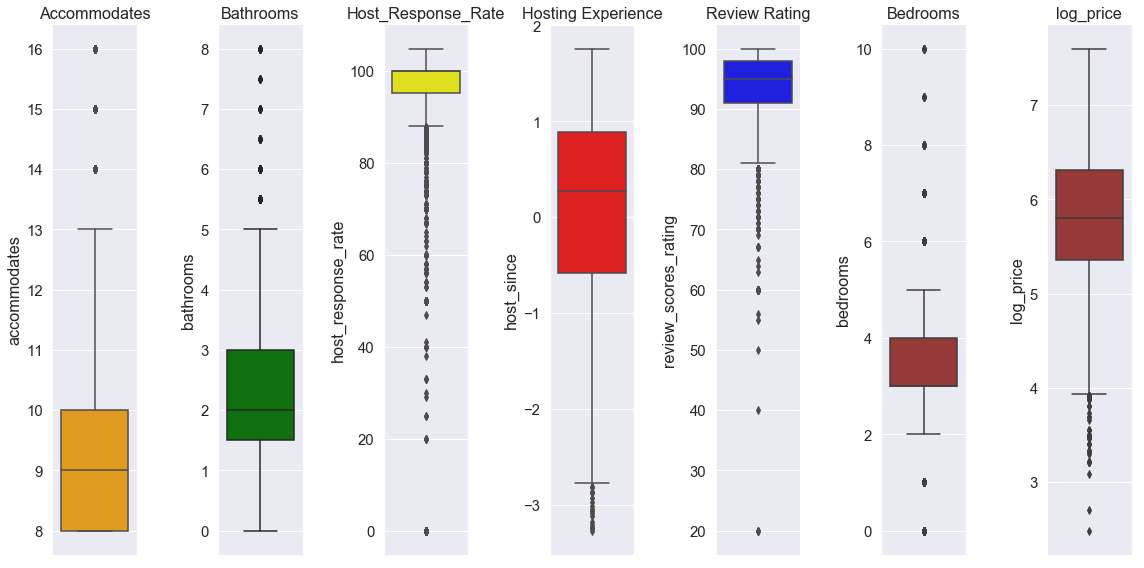

In [32]:
# Making the figure and subplots for the boxplot visualization:

fig,axes = plt.subplots(nrows=1,ncols=7,figsize=(16,8))


sbn.boxplot(df_h['accommodates'], ax = axes[0], orient='v', color='orange').set_title('Accommodates')
sbn.boxplot(df_h['bathrooms'], ax = axes[1], orient='v', color='green').set_title('Bathrooms')
sbn.boxplot(df_h['host_response_rate'], ax = axes[2], orient='v', color='yellow').set_title('Host_Response_Rate')
sbn.boxplot(df_h['host_since'], ax = axes[3], orient='v', color='red').set_title('Hosting Experience')
sbn.boxplot(df_h['review_scores_rating'], ax = axes[4], orient='v', color='blue').set_title('Review Rating')
sbn.boxplot(df_h['bedrooms'], ax = axes[5], orient='v', color='brown').set_title('Bedrooms')
sbn.boxplot(df_h['log_price'], ax = axes[6], orient='v', color='brown').set_title('log_price')

# For better visibility of labels:
plt.tight_layout()

In [33]:
# ANOVA Testing:

cat

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable']

In [34]:
# Testing on df dataset:
anova = ols('log_price ~ C(instant_bookable)', data = df).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     210.5
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.28e-47
Time:                        17:15:53   Log-Likelihood:                -72088.
No. Observations:               70494   AIC:                         1.442e+05
Df Residuals:                   70492   BIC:                         1.442e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [35]:
# Testing on df_high dataset:

anova = ols('log_price ~ C(instant_bookable)', data = df_h).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     34.51
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           4.62e-09
Time:                        17:15:59   Log-Likelihood:                -4024.1
No. Observations:                3602   AIC:                             8052.
Df Residuals:                    3600   BIC:                             8065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [36]:
df_h = df_h.drop(['host_identity_verified','bed_type','cleaning_fee','host_has_profile_pic'],axis=1)

****
From the above statistical testing, an insight appears that for (accommodates>8) or for group bookings, variables, [host_identity_verified','bed_type','cleaning_fee','host_has_profile_pic'] don't hold any significance.
****

In [37]:
# Chi-Square Testing:
cat

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable']

In [38]:
# Checking for dependencies b/w predictor categorical variables:

for i in range(0,len(cat)):
    for j in range(i+1,len(cat)):
                   chi2,p,dof,ex = chi2_contingency(pd.crosstab(df[cat[i]],df[cat[j]]))
                   print("P value for {:22} & {:22} is {}".format(cat[i],cat[j],p))
    print("-"*25)

P value for property_type          & room_type              is 0.0
P value for property_type          & bed_type               is 1.65476890649463e-25
P value for property_type          & cancellation_policy    is 2.7458259725114798e-42
P value for property_type          & cleaning_fee           is 2.138961323948454e-87
P value for property_type          & city                   is 0.0
P value for property_type          & host_has_profile_pic   is 0.8248629231220233
P value for property_type          & host_identity_verified is 1.7854923536524076e-28
P value for property_type          & instant_bookable       is 3.274914702047571e-39
-------------------------
P value for room_type              & bed_type               is 0.0
P value for room_type              & cancellation_policy    is 0.0
P value for room_type              & cleaning_fee           is 0.0
P value for room_type              & city                   is 1.9440071078705942e-220
P value for room_type              & host_ha

PCA for Dimensionality Reduction of numerical variables:


In [39]:
# Separate dataframes for target & predictor variables:

X = df.drop('log_price',axis=1)
y = df['log_price']

X_h = df_h.drop('log_price',axis=1)
y_h = df_h['log_price']

In [40]:
# Numerical dependent variables for PCA
num_dep = num.copy()
num_dep.remove('log_price')

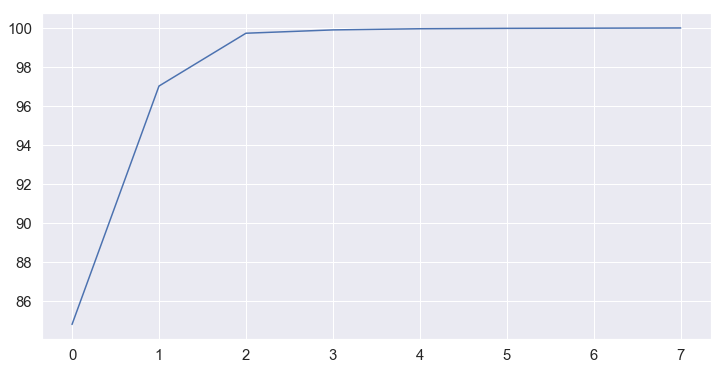

In [41]:
# Finding optimal no. of components:

pca = PCA(n_components = 8)
pca.fit(X[num_dep])
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

plt.figure(figsize = (12,6))
plt.plot(var1)

In [42]:
# Applying PCA(n=2) on the dataset:

pca = PCA(n_components=2)
X_num = pca.fit_transform(X[num_dep])

In [43]:
# Concatenating the PC with categorical columns:

X = np.concatenate((X_num,X[cat].values),1)
X.shape

(70494, 11)

In [44]:
# Splitting the data into training & testing data:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [45]:
# Random Forest algo with n_trees = 170

rf = RandomForestRegressor(n_estimators = 170)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(metrics.mean_squared_error(y_test,pred_rf))

0.19738685584707227
